In [1]:
import configparser
import snscrape.modules.twitter as sntwitter # to scrape tweets
import numpy as np
import pandas as pd
from wordcloud import WordCloud
from emot.emo_unicode import UNICODE_EMOJI # For emojis
import re
from collections import Counter
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import nltk
from nltk.corpus import stopwords       # to get stopwords from NLTK library
from nltk.tokenize import word_tokenize # to create word tokens
from nltk.stem import WordNetLemmatizer # to reduce words to orginal form
from nltk.corpus import words           # Get all words in english 

import string
import random
from PIL import Image

import textblob
from textblob import TextBlob

# Scraping data from the API

In [189]:
query = '"lang:en" "since:2022-10-21" BlackAdam OR blackadam OR BLACK ADAM OR black adam  -is:retweet -is:reply '

tweets = [] # create an empty list where tweets would be appended to
limit = 30000 # number of tweets to scrape
count=0

In [ ]:
for tweet in sntwitter.TwitterSearchScraper(query).get_items():
    count += 1 
    # break
    if len(tweets) == limit:
        break
    else:
        # append necessary attributes to empty list
        tweets.append([tweet.date, tweet.content, tweet.user.username, 
        tweet.user.location, tweet.retweetCount, tweet.likeCount, tweet.sourceLabel, tweet.coordinates])
#to turn tweetlist to a dataframe        
df = pd.DataFrame(tweets, columns=['date','tweet','username','location','retweetcount','likecount','source','coordinates'])    


In [193]:
title = "BlackAdam"
df.to_csv('blackadam1.csv')

## Assessing the data

In [4]:
blackadam_df=pd.read_csv(r"C:\Users\kibe\Desktop\Projects\Great learning Python\blackadamnew.csv")
#checking for duplicate entries
blackadam_df.duplicated().sum()

156

In [5]:
#to dropduplicate entries
blackadam_df= blackadam_df.drop_duplicates(keep='first')
blackadam_df.duplicated().sum()

0

In [6]:
#checking for null values
blackadam_df.isnull().sum()

date                0
text                0
username            0
location        10000
retweetcount        0
likecount           0
source              0
coordinates     29289
dtype: int64

In [7]:
#checking the data types of the columns
blackadam_df.dtypes

date            object
text            object
username        object
location        object
retweetcount     int64
likecount        int64
source          object
coordinates     object
dtype: object

In [8]:
#dropping unwanted columns
blackadam_df.drop("coordinates", axis=1, inplace=True)


In [12]:
blackadam_df.head()

,date,tweet,username,location,retweetcount,likecount,source
0,2022-10-27 08:00:57+00:00,Once I start going to the movies again it’s ad...,Ssentongopeter5,Uganda,0,0,Twitter for iPhone
1,2022-10-27 08:00:53+00:00,@VootSelect Fights achi thi black adam mein\n#...,kyabolunmain,NaN,1,0,Twitter for Android
2,2022-10-27 08:00:42+00:00,@innocenttt_k Shey dem curfew your ass with be...,A_damex,Ghana,0,0,Twitter for Android
3,2022-10-27 08:00:41+00:00,"As Black History Month draws to a close, BEIS ...",CSCollegeOrg,"Queen Anne's Gate, London",0,0,Hootsuite Inc.
4,2022-10-27 08:00:32+00:00,@VootSelect Black adam mein hawk man ka charac...,kyabolunmain,NaN,1,0,Twitter for Android


In [13]:
#saving the cleaned dataframe to csv file
blackadam_df.to_csv("new_clean_blackadam.csv")

# Data Processing

In [14]:
#function to remove hashtag
def Hashtag(tweet):
    tweet = tweet.lower()  #converts tweet to lower case
    tweet = re.findall(r'\#\w+',tweet)  
    return " ".join(tweet)

In [16]:
blackadam_df['hashtags'] = blackadam_df['tweet'].apply(Hashtag)
blackadam_df.head(5)

,date,tweet,username,location,retweetcount,likecount,source,hashtags
0,2022-10-27 08:00:57+00:00,Once I start going to the movies again it’s ad...,Ssentongopeter5,Uganda,0,0,Twitter for iPhone,
1,2022-10-27 08:00:53+00:00,@VootSelect Fights achi thi black adam mein\n#...,kyabolunmain,NaN,1,0,Twitter for Android,#shivistheboss #shivthakare
2,2022-10-27 08:00:42+00:00,@innocenttt_k Shey dem curfew your ass with be...,A_damex,Ghana,0,0,Twitter for Android,
3,2022-10-27 08:00:41+00:00,"As Black History Month draws to a close, BEIS ...",CSCollegeOrg,"Queen Anne's Gate, London",0,0,Hootsuite Inc.,
4,2022-10-27 08:00:32+00:00,@VootSelect Black adam mein hawk man ka charac...,kyabolunmain,NaN,1,0,Twitter for Android,#shivistheboss #shivthakare


In [17]:
#converting the hashtag column to a list in other to get the value counts
hashtag_list = blackadam_df["hashtags"].to_list()

new_hashtags = []
for hash in hashtag_list:
    new_hash = hash.split()
    for new in new_hash:
        new_hashtags.append(new)
        new_hashtags


In [18]:
counts = Counter(new_hashtags)
hashtag_df = pd.DataFrame.from_dict(counts, orient="index").reset_index()
hashtag_df.columns = ["hashtag", "counts"]
hashtag_df.sort_values("counts", ascending=False, inplace=True)
hashtag_df.head()

,hashtag,counts
2,#blackadam,1355
17,#blackadammovie,549
10,#dccomics,233
3,#dceu,158
18,#superman,139


In [20]:
hashtag_df.to_csv("new_blackadam_hashtags.csv")

In [21]:
#defining processed content by removing words that do not contribute to any analysis.
stop_words = list(stopwords.words('english'))
user_stop_words = ["i", "i'm", "me", "my", "myself", "we", "our", "ours", "ourselves", "you", "your", "yours", "yourself", 
                   "yourselves", "he", "him", "his", "himself", "she", "her", "hers", "herself", "it", "its", "itself",
                   "they", "them", "their", "theirs", "themselves", "what", "which", "who", "whom", "this", "that", 
                   "these", "those", "am", "is", "are", "was", "were", "be", "been", "being", "have", "has", "had", 
                   "having", "do", "does", "did", "doing", "a", "an", "the", "and", "but", "i'll","we'll","they'll",
                   "'s",'anyone','today','yesterday','day','isnt', 'shouldnt', "didn't", 'wasnt', 'werent','mustnt', 
                   "been…",'aht', 've', 'next',"all", "any", "both", "each", 'by',
                   "year"]

words = ["blackadam", "dc comics","dccomics","black adam", "superman", "henry cavil", "henrycavil", "super man", "the rock", "therock",'dwayne johnson','dwaynejohnson']
alphabets = list(string.ascii_lowercase)
stop_words = stop_words + user_stop_words + alphabets + words
emojis = list(UNICODE_EMOJI.keys())

In [22]:
def processing_tweets(tweet):
    tweet = tweet.lower()
    tweet = re.sub(r"http\S+|www\S+|https\S+", '', tweet, flags = re.MULTILINE)   # Cleaning and removing URL’s
    tweet = re.sub(r'\@\w+|\#\w+|\d+', '',  tweet)                                # Cleaning and removing repeating characters
    tweet_tokens = word_tokenize(tweet)  
    filter_words = [w for w in tweet_tokens if w not in stop_words]
    filter_words = [w for w in filter_words if w not in emojis]
    unpunctuated_words = [w for w in filter_words if w not in string.punctuation] # Cleaning and removing punctuations
    lemmatizer = WordNetLemmatizer() 
    lemmatized_words = [lemmatizer.lemmatize(w) for w in unpunctuated_words]
    return " ".join(lemmatized_words)

In [24]:
# create a new column called 'cleaned tweets' by applying processing tweets function to the tweet column.
blackadam_df['cleaned_tweets'] = blackadam_df['tweet'].apply(processing_tweets)
blackadam_df.head()

,date,tweet,username,location,retweetcount,likecount,source,hashtags,cleaned_tweets
0,2022-10-27 08:00:57+00:00,Once I start going to the movies again it’s ad...,Ssentongopeter5,Uganda,0,0,Twitter for iPhone,,start going movie ’ addictive till ’ done movi...
1,2022-10-27 08:00:53+00:00,@VootSelect Fights achi thi black adam mein\n#...,kyabolunmain,NaN,1,0,Twitter for Android,#shivistheboss #shivthakare,fight achi thi black adam mein
2,2022-10-27 08:00:42+00:00,@innocenttt_k Shey dem curfew your ass with be...,A_damex,Ghana,0,0,Twitter for Android,,shey dem curfew as belt ait
3,2022-10-27 08:00:41+00:00,"As Black History Month draws to a close, BEIS ...",CSCollegeOrg,"Queen Anne's Gate, London",0,0,Hootsuite Inc.,,black history month draw close beis internatio...
4,2022-10-27 08:00:32+00:00,@VootSelect Black adam mein hawk man ka charac...,kyabolunmain,NaN,1,0,Twitter for Android,#shivistheboss #shivthakare,black adam mein hawk man ka character acha wri...


In [25]:
#Extract all cleanned tweets into one list string with each word separate with a "space"

tweets_list_string = blackadam_df["cleaned_tweets"].tolist()
tweets_list_string = " ".join(tweets_list_string)
blackadam_df.sample(5)

,date,tweet,username,location,retweetcount,likecount,source,hashtags,cleaned_tweets
25533,2022-10-24 14:06:15+00:00,@62224152b @fellawhomstdve In the context of t...,furnace_arc,NaN,0,5,Twitter Web App,,context dceu absolutely point 're really sayin...
16664,2022-10-25 04:29:50+00:00,Ohk I am kind of late but man I watched BLACK ...,SatwalMohit,NaN,0,0,Twitter for iPad,#blackadam,ohk kind late man watched black adam want say ...
24352,2022-10-24 15:58:37+00:00,"SHEESH! 💸 'Black Adam’ Opens With $67 Million,...",Bee4theclout,NaN,0,0,Twitter for iPhone,,sheesh 'black adam ’ open million marking dway...
12940,2022-10-25 16:53:46+00:00,@TheCriticalDri2 I haven't seen Black Adam yet...,sessionka,United States,0,0,Twitter Web App,,n't seen black adam yet 'm excited cameo
1673,2022-10-27 01:26:36+00:00,Everyone be watching black adam without me🥲,Dsjunkie2,NaN,0,0,Twitter for iPhone,,everyone watching black adam without me🥲


# Sentiment Analysis

In [26]:
def get_tweet_polarity(tweet):
        """
        Utility function to classify sentiment of passed tweet
        using textblob's sentiment method
        """
        return TextBlob(tweet).sentiment.polarity
def get_sentiment_textblob(text):
        if text > 0:                
            return "positive"
        elif text == 0:
            return "neutral"
        else:
            return "negative"

In [27]:
# create a new column called 'polarity' & 'sentiment' by applying 'get tweet polarity' & 'get sentiment textblob' 
#function to the 'cleaned tweet' & 'polarity' column.

blackadam_df['polarity']=blackadam_df['cleaned_tweets'].apply(get_tweet_polarity)
blackadam_df['sentiment']=blackadam_df['polarity'].apply(get_sentiment_textblob)
blackadam_df['sentiment'].sample(5)

15574    negative
8843     positive
25565    negative
20379    negative
16380    negative
Name: sentiment, dtype: object

In [28]:
blackadam_df['polarity'].sample(5)

16417    0.133333
644     -0.166667
13925   -0.166667
1556    -0.088889
28576    0.277778
Name: polarity, dtype: float64

In [29]:
#create a function to calculate the total and percentage of sentiments

def sentiment_count(data, count):
    total = data.loc[:,count].value_counts(dropna=False)
    percentage = round(data.loc[:,count].value_counts(dropna=False,normalize=True)*100,2)
    return pd.concat([total, percentage],axis=1,keys=["total", "Percentage"])

In [30]:
#save sentiment count to csv for visualization

sentiment_count(blackadam_df, "sentiment").to_csv("new_sentiment_count.csv")

In [32]:
# get unique values and count in sentiment column

sentiment_df = blackadam_df['sentiment'].value_counts()


# Visualization

In [33]:
#define a function to design the backgorund of word cloud object

def word_color_func(word, font_size, position, orientation="horizontal", random_state=None,**kwargs):
    return "hsl(34, 99%%, %d%%)" % random.randint(50, 80)

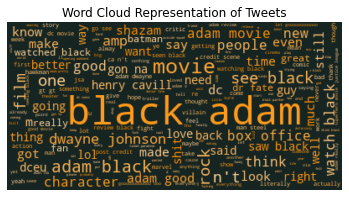

In [34]:
twitter_wc = WordCloud(background_color='#172522')

# generate the word cloud
twitter_wc.generate(tweets_list_string)

# display the word cloud
plt.figure()


plt.imshow(twitter_wc.recolor(color_func = word_color_func, random_state=3),
           interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud Representation of Tweets");
plt.show()

# store to file
#plt.savefig("blackadamedit.png", format="png")
#plt.show()

Text(0.5, 1.0, 'Twitter Users Sentiments on Black Adam movie')

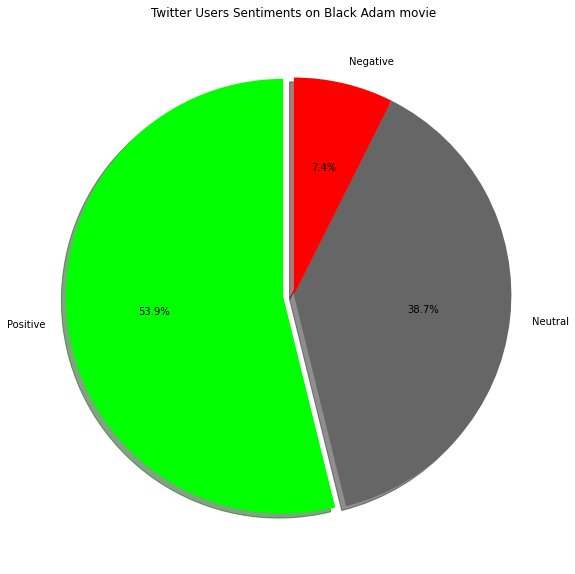

In [42]:
#Plotting a pie chart to show distribution of Sentiments

labels = "Positive", "Neutral", "Negative"
explode = (0.05, 0, 0)                                              # only "explode" the first slice (i.e. 'positive')
plt.figure(figsize=[15,10], facecolor='none')
plt.pie(sentiment_df, labels=labels, colors=['#00FF00','#666666', '#FF0000'], 
        startangle=90, shadow=True, explode=explode, autopct='%1.1f%%');
plt.title('Twitter Users Sentiments on Black Adam movie')

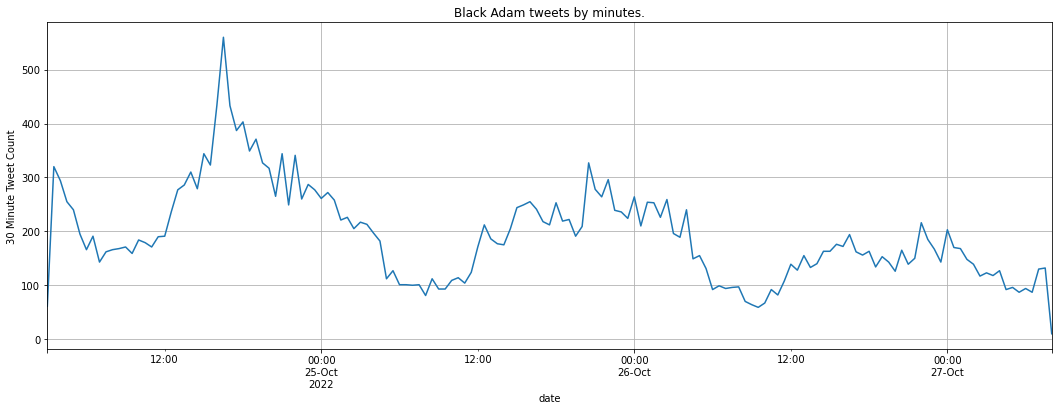

In [44]:
blackadam_df['date'] = pd.to_datetime(blackadam_df['date'])


tweet_time_df = blackadam_df.groupby(pd.Grouper(key='date', freq='30Min', convention='start')).size()
tweet_time_df.plot(figsize=(18,6))
plt.ylabel("30 Minute Tweet Count")
plt.title("Black Adam tweets by 30 minutes.")
plt.grid(True)